In [4]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib
# !pip install yellowbrick

In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# Read in csv
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select features (columns)

In [5]:
# Set target, features and feature_names.
target = df["koi_disposition"]
data = df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

In [6]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)


In [7]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model (K-nearest neighbors)

k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824
k: 21, Train/Test Score: 0.839/0.823
k: 23, Train/Test Score: 0.840/0.826
k: 25, Train/Test Score: 0.837/0.824
k: 27, Train/Test Score: 0.836/0.822
k: 29, Train/Test Score: 0.835/0.824
k: 31, Train/Test Score: 0.834/0.820
k: 33, Train/Test Score: 0.835/0.827
k: 35, Train/Test Score: 0.833/0.826
k: 37, Train/Test Score: 0.834/0.822
k: 39, Train/Test Score: 0.833/0.824
k: 41, Train/Test Score: 0.832/0.823
k: 43, Train/Test Score: 0.830/0.823
k: 45, Train/Test Score: 0.828/0.824
k: 47, Train/Test Score: 0.829/0.824
k: 49, Train/Test Score: 0.829/0.825
k: 51, Train/Test Score: 0.828/0.825
k: 53, Train/Test Score: 0.828/0.824
k: 55,

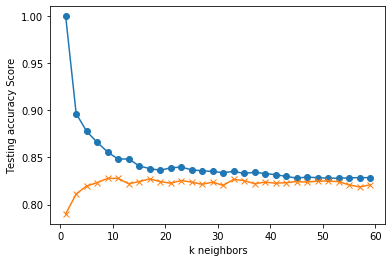

In [9]:
# Create the KNN Model
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("image/logistic_featureimportance.png")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
print('k=29 Test Acc: %.3f' % knn.score(X_test, y_test))

k=29 Test Acc: 0.636


In [11]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.6751859622353614
Testing Data Score: 0.6361556064073226


In [12]:
knn.predict(X_test)[:10]

array(['CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE',
       'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [13]:
knn.predict_proba(X_test)[:10]

array([[0.24137931, 0.62068966, 0.13793103],
       [0.37931034, 0.48275862, 0.13793103],
       [0.20689655, 0.17241379, 0.62068966],
       [0.03448276, 0.        , 0.96551724],
       [0.13793103, 0.17241379, 0.68965517],
       [0.27586207, 0.44827586, 0.27586207],
       [0.55172414, 0.44827586, 0.        ],
       [0.4137931 , 0.03448276, 0.55172414],
       [0.24137931, 0.62068966, 0.13793103],
       [0.34482759, 0.24137931, 0.4137931 ]])

# Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [14]:
k_range = list(range(1, 60, 2))
print(k_range)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


In [15]:
param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'], metric =['euclidean','manhattan'] )
print(param_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [16]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, verbose =1, cv = 10, n_jobs = -1)

In [17]:
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=29, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [18]:
# List the best parameters for this dataset
print(f"Best Grid Parameters: {grid.best_params_}")
# List the best score
print(f"Best Grid Score: {grid.best_score_}")
# List the best estimator
print(f"Best Grid Estimator: {grid.best_estimator_}")

Best Grid Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Grid Score: 0.8466452199200291
Best Grid Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')


In [19]:
print(f"Training Grid Score: {grid.score(X_train_scaled, y_train)}")

Training Grid Score: 1.0


In [20]:
print(f"Testing Grid Score: {grid.score(X_test_scaled, y_test)}")

Testing Grid Score: 0.8421052631578947


In [21]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [22]:
knn.predict(X_test_scaled)[:10]

array(['CONFIRMED', 'CONFIRMED', 'CONFIRMED', 'CONFIRMED', 'CONFIRMED',
       'CONFIRMED', 'CONFIRMED', 'CONFIRMED', 'CONFIRMED', 'CONFIRMED'],
      dtype=object)

In [23]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.57      0.64       411
     CONFIRMED       0.69      0.80      0.74       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



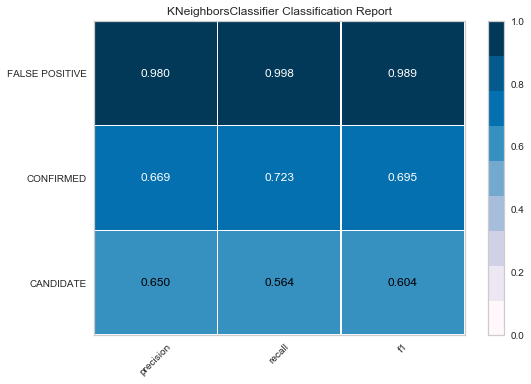

In [24]:
# %matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(KNeighborsClassifier(),cmap="PuBu")
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()
viz.show(outpath="image/Knn_classifier.png")

# Save the Model

In [47]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_sav/ermias_gaga_knn.sav'
joblib.dump(knn, filename)

['model_sav/ermias_gaga_knn.sav']